In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
data = pd.read_csv("household_power_consumption.txt", sep=";")
data

C:\Users\dulin\AppData\Local\Temp\ipykernel_74968\1719329629.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("household_power_consumption.txt", sep=";")


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [3]:
data['Datetime'] = pd.to_datetime(data['Date'] + " " + data['Time'] , format='%d/%m/%Y %H:%M:%S')
data = data.drop(columns=['Date','Time'])
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...
2075254,0.946,0.0,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00
2075255,0.944,0.0,240.0,4.0,0.0,0.0,0.0,2010-11-26 20:59:00
2075256,0.938,0.0,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00
2075257,0.934,0.0,239.7,3.8,0.0,0.0,0.0,2010-11-26 21:01:00


In [ ]:
data.set_index("Datetime")


Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
Datetime                     0
dtype: int64

In [20]:
data_hourly = data.resample("H", on='Datetime').mean()

C:\Users\dulin\AppData\Local\Temp\ipykernel_74968\1293110787.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_hourly = data.resample("H", on='Datetime').mean()


TypeError: agg function failed [how->mean,dtype->object]

In [16]:
df = data.copy()
df = df.drop(columns=['Global_reactive_power', 'Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3'])
df.index = pd.to_datetime(df.index)

<Axes: >

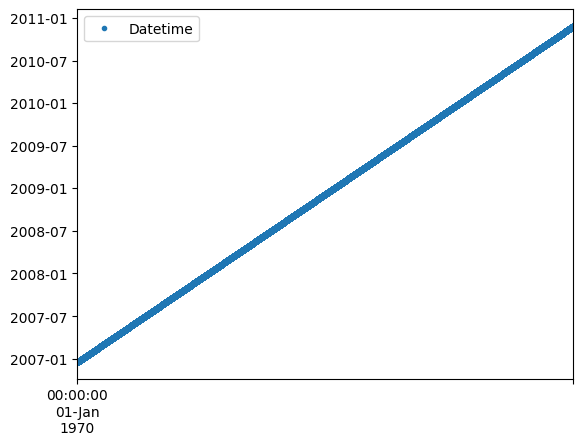

In [17]:
df.plot( style='.')
